In [1]:
import os
from glob import glob
import tifffile as tff
import numpy as np
import matplotlib.pyplot as plt

In [5]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/Fly_imaging_in_vivo/B07-3_Yajie_scope/'
os.path.exists(imgPath)

True

In [6]:
imgFiles = glob(imgPath + '/*.tif')
imgFiles = sorted(imgFiles)
# imgFiles

In [7]:
imgFiles[0]

'/Volumes/genie/Jihong_GENIE_stuff/Fly_imaging_in_vivo/B07-3_Yajie_scope/axon_00001_00001.tif'

In [8]:
imgFile = tff.TiffFile(imgFiles[0])
imgFile = imgFile.asarray()

In [9]:
imgFile.shape

(10000, 48, 512)

In [ ]:
img = []

for i in range(1,len(imgFiles)):
    imgFile = tff.TiffFile(imgFiles[i])
    imgFile = imgFile.asarray()
    
#     print(imgFile.shape)
    img.append(imgFile)

In [ ]:
i=0
for image in img:
    i+=1
    if image.shape != (32,256):
        print(i)

In [ ]:
img[1].shape

In [10]:
meanImg = np.mean(imgFile, axis=0)

In [11]:
meanImg.shape

(48, 512)

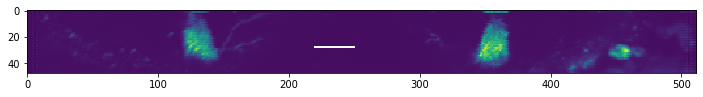

In [12]:
fig = plt.figure(figsize=[12,6])
vmin = np.min(meanImg)
vmax = np.max(meanImg)

plt.imshow(meanImg, vmin=vmin, vmax=vmax)
plt.plot([220,250], [28,28], lw=2, color='w')
# fig.savefig('C:\\Users\\zhengj10\\Desktop\\ASAP2f.png')
plt.show()


In [13]:
from skimage.io import imsave

In [14]:
# img = np.array(img)
# print(img.shape)
imsave('/Users/zhengj10/Desktop/imgFile.tif', imgFile)

//anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: /Users/zhengj10/Desktop/imgFile.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [15]:
os.getcwd()

'/Users/zhengj10/Python/GENIE/Fly imaging'

In [16]:
from registration import CrossCorr

In [17]:
reference =meanImg


In [21]:
regImg = []
algorithm = CrossCorr()
# for i in range(len(imgFiles)):
for i in range(1):
    imgFile = tff.TiffFile(imgFiles[i])
    imgFile = imgFile.asarray()
    model = algorithm.fit(imgFile, reference)
    registered = model.transform(imgFile)
    registered = registered.toarray()
    regImg.append(registered)
    if i%200 == 0:
        print(i)
print ('Trials averaging completed')

0
Trials averaging completed


In [22]:
regImg = np.array(regImg)

In [24]:
# imsave('/Users/zhengj10/Desktop/reg_img.tif', regImg)

//anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: /Users/zhengj10/Desktop/reg_img.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [ ]:
mean_regImg = np.mean(regImg, axis=0)

In [ ]:
fig = plt.figure()
vmin = np.min(mean_regImg)
vmax = np.max(mean_regImg)*0.75

plt.imshow(meanImg, vmin=vmin, vmax=vmax)
plt.plot([200,250], [25,25], lw=2, color='w')

plt.show()
# fig.savefig('C:\\Users\\zhengj10\\Desktop\\ASAP2f.png')
